In [28]:
# Ian McLean   1877711
# PHYS 434 Lab 3
# 10/26/2022

__Rejection method__

__a. Unform sampling__

1). Find the maximum value of beta(α=5.0,β=3.) denoted as betamax.

In [29]:
# importing necessary imports
import numpy as np
import scipy as sp
from scipy.stats import beta
from matplotlib import pyplot as plt

# defining a linspace for beta distribution
x_lin = np.linspace(0, 1, 1002)[1:-1]
# beta distribution with given parameters
dist = beta(5, 3)

# calculating max of the distribution and rounding
betamax = max(dist.pdf(x_lin))
betamax = np.round(betamax,3)
print('The max value of beta(α=5.0,β=3) is: ' + str(betamax))

The max value of beta(α=5.0,β=3) is: 2.305


In order to calculate the max value of the beta distribution, we first need to generate the beta distribution for a given x array, and given Beta parameters. In this case, the parameters are alpha = 5 and beta = 3 and this can be plotted to get a rough estimate of where the maximum on the desired interval should be. From there, we can just use the built-in max function to find the maximum value of the beta distribution and call it betamax.

2). Generate an uniform distribution sample x between [0, 1]



In [30]:
# generating the uniform x distribution sample
x = np.random.uniform(0,1,100000)

A random distribution sample is created from the uniform distribution. The size is very large to ensure that for N = 1000 later on, it is likely that enough unique points that satisfy the conditions will have been generated, and avoid repeats.

3). Draw another uniform distribution y between [0, betamax]



In [31]:
# generating the uniform y distribution sample
y = np.random.uniform(0,betamax,100000)

In the case of the y sample, it is taken from 0 to the maximum value of the beta distribution which is betamax. Thus, all points sampled shouldn't be signifigantly above the distribution. Once again, 100k points were chosen to ensure that no repeats were needed, thus making enough unique values. 

4). For each xi, compute the event weight w(xi) and only keep xi when w(xi)≥y

5). Generate this sample until accepted events N=1000 events

In [32]:
# initializing counter and list to hold non-rejected values
sample = []
counter = 0

# making a list of accepted x coordinates until length reaches 1000
while len(sample) < 1000:
    # if condition is met, append original x coordinate
    if (dist.pdf(x[counter])/betamax) > y[counter]:
        sample.append(x[counter])
    #stepping counter by 1
    counter = counter + 1

print("The length of the events sample is: " + str(len(sample)))

The length of the events sample is: 1000


The code in this section will generate 1000 unique and random x values which meet the condition set by us in the while loop. A counter steps though the while loop and for the elements in the 100K long randomly generated array, they are plugged into the weight function and appended to a list if they satisfy the condition of being bigger than the corresponding y randomly generated value. Once this happens 1000 times, the while loop breaks. We can then see that the length of this array is indeed 1000.

Q1. What is the event weight formula?

In the general sense, the weight function is:
    $$w(x) = \frac{f(x)}{g(x)}$$
where $f(x) = \beta(x)$, or the beta function PDF of the uniform distribution along the x axis. In this case, our g(x) is the uniform distribution taken at 1, this $g(x) = 1$ so the weight function can be calculated as:$$w(x) = \frac{\beta{x}}{1 * Betamax} = \beta(x)$$

Q2. What is the total number of samplings (pairs of x, y) required for this MC simulation?

In [33]:
print("The total number of samplings required for this MC simulation is: " + str(counter))

The total number of samplings required for this MC simulation is: 5662


In order to get the total number of samplings required for this MC simulation, we must count the counter and see how many times it had to count before the condition of list = 1000 was satisfied. In this case, we can see that it is generally around the value of 5500 to 5700 samplings as printed above, however it can very depending on the randomly generated x and y arrays.

__b. Gaussian sampling__
Repeat steps above but using a Gaussian distribution sample x.

Generate an uniform distribution sample x between [0, 1]

Draw another uniform distribution y between [0, betamax]

For each xi, compute the event weight w(xi) and only keep xi when w(xi)≥y 

Generate this sample until accepted events N=1000 events.



In [34]:
# generating the gaussian x distribution sample
x2 = np.random.normal(1.35,0.8,size = 10000)

# generating the gaussian y distribution sample
y2 = np.random.uniform(0,1,10000)

# Transforming the uniform linspace with the pdf
import scipy.stats as stats
y_t = stats.norm.pdf(y2)

# initializing counter and list to hold non-rejected values
sample2 = []
counter2 = 0

# making a list of accepted x coordinates until length reaches 1000
while len(sample2) < 1000:
    # if condition is met, append original x coordinate
    if (dist.pdf(y2[counter2]))/((y_t[counter2])*betamax) > x2[counter2]:
        sample2.append(y2[counter2])
   
    #stepping counter by 1
    counter2 = counter2 + 1

print("The length of the events sample is: " + str(len(sample2)))

The length of the events sample is: 1000


As seen above, the code is essentially the same concept with a few minor changes. For instance, our weight function is different as $g(x)$ can no longer be 1 as it is not the uniform distribution anymore, but instead the PDF of the normal distribution from [0,1]. In order to get our array, we must change the required condition in the for loop where we are appending the original x value if the weight function is larger than the y value at a given index.

Q1. What is your choice of Gaussian distribtuion parameter for the importance sample?

When determining the Gaussian distribution parameter, it is important to consider the histogram from the uniform distribution, where the mean can be considered between around 1.35, and most values should lie between $3\sigma$ so we pick a standard deviation around .75 to cover the distance from the mean to each tail (more or less) of the distribution.

Q2. What is the event weight formula?

$$w(x) = \frac{f(x)}{g(x)} = \frac{\beta(x)}{N(y)*Betamax}$$
In other words, the PDF of the beta distribution of x, is divided by g(x) which is the PDF of the normal distribution of y and multiplied by betamax in the denominator. This is calculated for each element in the x and y array length. 

Q3. What is the total number of sampling (pairs of x, y) required for this MC simulation? How is this compared with the uniform sampling?



In [35]:
print("The total number of samplings required for this MC simulation is: " + str(counter2))

The total number of samplings required for this MC simulation is: 2057


As we can see, this value is several thousand less than that required of the uniform sampling in order to get to N = 1000. Approximatly 2000 depending on randomness of the randomly generated values in the x and y arrays. This implies the gaussian sampling may be a better fit for this rejection sampling as less useless points are taken, then compared with the uniform sampling. Several thousands too, which is significant.

__Visualization__

Plot two distribtuions and the analytic probability distribution in the same plot. Label legends and use different line style for each curve.



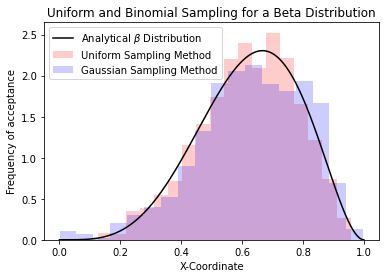

In [36]:
# defining linspace for plotting the function
x_p = np.linspace(0, 1, 1002)[1:-1]

# plotting the beta function and the two different histograms
plt.plot(x_p, dist.pdf(x_p), ls="-", c='black')
plt.hist(sample, alpha = .2, color = 'red', density = True, bins = 18)
plt.hist(sample2, alpha = .2, color = 'blue', density = True, bins = 18)

# Adding all labels, details, and legend onto the plot
plt.xlabel('X-Coordinate')
plt.ylabel('Frequency of acceptance')
plt.title('Uniform and Binomial Sampling for a Beta Distribution')
plt.legend([r'Analytical $\beta$ Distribution', 'Uniform Sampling Method', 'Gaussian Sampling Method'])

The histogram plots above are a great visualization for what is happening in both cases of rejection sampling. The actual beta distribution can be seen by the black line where the maximum value hovers somewhere around 2.3. From there, the uniform sampling method which took approximately 3000 more samplings than the gaussian sampling, is plotted and shows pretty good fit to the plot. Although. some areas cound look slightly more precise than others. As for the Gaussian method, it is slightly more fitted, although still very similar to the uniform sampling method. However, it can be achieved in aproximately 3000 less samplings.

__Sphere in 3D__
Let's first start with a simple problem of determining the mass of a sphere with uniform density ρ0=2kg/m3 (kilogram per cubic meter). The sphere has a radius of 1 meter, and we initially integrate it with N=100 points.

Generate an array of N random numbers for the x, y, and z coordinates. Make sure that all points lie in a cube enclosing the sphere.



In [37]:
# importing necessary imports
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

# limits and number of coordinates
low = -1
high = 1
N = 100
  
# generating from random uniform distribution based on limits and size above
x = np.random.uniform(low,high,N)
y = np.random.uniform(low,high,N)
z = np.random.uniform(low,high,N) 
    
# initializing empty list to hold each set of coordinates
list_of_coordinates = []

# generating 1000 pairs of coordinates
for i in range(N):
    # refresh the cumulative pair list every time
    coord = []
    coord.append(x[i])
    coord.append(y[i])
    coord.append(z[i])
    # add list of both coordinates to set containing both coordinates
    list_of_coordinates.append(coord)
    

In order to generate N random sets of coordinates in x-y-z space, we can consider the coordinates generated all independent of eachother as they are supposed to be random anyways, and from there, the values in each list corresponding to the same index can be combined together into a singular random coordinate. So, from -1 to 1, 1000 points are generated for x,y, and z and for each corresponding element per index, they are put together in a list and that list is then put into a collective list of all 100 coordinates.

2). Generate an index function. This is an array that is equal to 1 for points inside the sphere and 0 outside the sphere.

In [38]:
# empty list to hold the index function
index = []

# for each list (random coordinate) in the collective list of coordinates
for i in list_of_coordinates:
    # 0 if point lies outside sphere as calculated by radius from origin to point
    if np.sqrt((i[0])**2 + (i[1])**2 + (i[2])**2) > 1:
        index.append(0)
    # for the case that it must be within the circle
    else:
        index.append(1)

# converting type to array
index = np.array(index)
print(index)


[1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1]


In order to calculate the index function, we can consider the distance from the origin $(0,0,0)$ to the randomly generated point $(x_{i}, y_{i}, z_{i})$ and if it is a radius larger than 1, it will be outside of the sphere (as we consider the unit sphere). This is considered a 0, whereas inside the sphere with a radius less than 1 is considered a 1 in the index function. We check that for all 100 pairs of coordinates.

3). Calculate the mass and uncertainty of mass by applying the Monte Carlo integration method m=V/N∑Ni=1f(x,y,z) (Think about what V means here)

In [39]:
# N is changed to 100K
N = 100

# generating from random uniform distribution based on limits and size above
x = np.random.uniform(low,high,N)
y = np.random.uniform(low,high,N)
z = np.random.uniform(low,high,N) 
    
# initializing empty list to hold each set of coordinates
list_of_coordinates = []

# generating 1000 pairs of coordinates
for i in range(N):
    # refresh the cumulative pair list every time
    coord = []
    coord.append(x[i])
    coord.append(y[i])
    coord.append(z[i])
    # add list of both coordinates to set containing both coordinates
    list_of_coordinates.append(coord)

# array to hold index function used to calculate mass
index = []

# checking if each point lies inside or outside of the sphere. If so, append a 0 to index array
for i in list_of_coordinates:
    if np.sqrt((i[0])**2 + (i[1])**2 + (i[2])**2) > 1:
        index.append(0)
    # inside sphere, index function is a 1 for that point
    else:
        index.append(1)

# changing index to an array
index = np.array(index)

# sum of all points inside the sphere where index for them is 1
pt_sum = (len(index[index == 1]))

#volume of cube with side lengths 2 = 8
V = 8

# constant mass density
p = 2

# equation for calculating the mass of a sphere
mass = V*p*pt_sum/N
print("The mass of the sphere with N = 100 points is: " +str(mass))
print("The uncertainty of the mass of the sphere with N = 100 points is: " + str(round(np.sqrt((1 - (pt_sum)/(int(N)))/pt_sum),3)))


The mass of the sphere with N = 100 points is: 8.32
The uncertainty of the mass of the sphere with N = 100 points is: 0.096


When we calculate the mass of the sphere with N = 100 points, it is clearly not enough to get close to the analytical value of about 8.377. Essentially whart happens here, is that we generate 100 independent values between -1 and 1 for the x,y, and z coordinates and combine them together into lists for cooresponding indices. This gives a list of 100 lists where each list is a set of coordinates for a point. The conditions for an index function are then checked, where the distance from the origin to the point being less than 1 is within the sphere and anything larger than 1 is not considered. Then, by the simple formula $m =\rho * V * \frac{\sum{Ni}}{N} $ where the volume of the cube enclosing the sphere is 8, the total N is 100 and the sum Ni is the number of times the index is 1 in the index function. Rho is just 2 in this case as that is the constant density. This equation gives us our value for the mass which is slightly off and would benefit from more points being simulated. It is also clear that our approximate uncertainty is significantly large for only N = 100

Change N from 100 to 100K with 100 steps. Plot the mass as function of N, and uncertainty of mass as function of N. Comment on the convergence of integration and agreement with the theoretical value $m=\rho\frac{4}{3}\pi r^{3}=\frac{8}{3}\pi$.

In [40]:
# N is changed to 100K
N = 100000

# generating from random uniform distribution based on limits and size above
x = np.random.uniform(low,high,N)
y = np.random.uniform(low,high,N)
z = np.random.uniform(low,high,N) 
    
# initializing empty list to hold each set of coordinates
list_of_coordinates = []

# generating 100000 pairs of coordinates
for i in range(N):
    # refresh the cumulative pair list every time
    coord = []
    coord.append(x[i])
    coord.append(y[i])
    coord.append(z[i])
    # add list of both coordinates to set containing both coordinates
    list_of_coordinates.append(coord)

# array to hold index function used to calculate mass
index = []

# checking if each point lies inside or outside of the sphere. If so, append a 0 to index array
for i in list_of_coordinates:
    if np.sqrt((i[0])**2 + (i[1])**2 + (i[2])**2) > 1:
        index.append(0)
    # inside sphere, index function is a 1 for that point
    else:
        index.append(1)

# changing index to an array
index = np.array(index)

# sum of all points inside the sphere where index for them is 1
pt_sum = (len(index[index == 1]))

#volume of cube with side lengths 2 = 8
V = 8

# constant mass density
p = 2

# equation for calculating the mass of a sphere
mass = V*p*pt_sum/N

print("The mass of the sphere with N = 100K points is: " +str(mass))
print("The uncertainty of the mass of the sphere with N = 100K points is: " + str(round(np.sqrt((1 - (pt_sum)/(int(N)))/pt_sum),3)))

The mass of the sphere with N = 100K points is: 8.40208
The uncertainty of the mass of the sphere with N = 100K points is: 0.003


For clarity, the mass is calculated with 100K points and it is clear that the ionly thing changed was the number of points. This led to a more accurate value when compared to the analytical value of 8.377, so when we plot the mass vs N we should expect a convergence with increasing N. As expected, our calcualted uncertainty went down an order of magnitude as well, further supporting the convergence of simulated mass with increasing N.

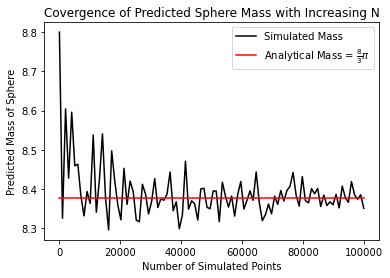

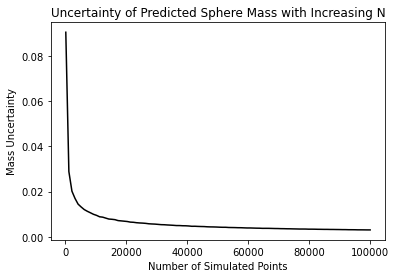

In [41]:
# starting value
n_in = 100
# ending value
n_fin = 100000
# linspace from starting to end in 100 steps
n_vals = np.linspace(start = n_in, stop = n_fin, num = 100)

# lists to hold values of coordinates, masses, and uncertainties
list_of_coordinates = []
masses = []
uncertainties = []

# for each step of N defined in linspace
for N in n_vals:
    # generating from random uniform distribution based on limits and size above
    x = np.random.uniform(low,high,int(N))
    y = np.random.uniform(low,high,int(N))
    z = np.random.uniform(low,high,int(N)) 
    
    # initializing empty list to hold each set of coordinates
    list_of_coordinates = []
    
    # generating N pairs of coordinates
    for i in range(int(N)):
        # refresh the cumulative pair list every time
        coord = []
        coord.append(x[i])
        coord.append(y[i])
        coord.append(z[i])
        # add list of both coordinates to set containing both coordinates
        list_of_coordinates.append(coord)

    # array to hold index function used to calculate mass
    index = []
    
    # checking if each point lies inside or outside of the sphere. If so, append a 0 to index array
    for i in list_of_coordinates:
        if np.sqrt((i[0])**2 + (i[1])**2 + (i[2])**2) > 1:
            index.append(0)
        # inside sphere, index function is a 1 for that point
        else:
            index.append(1)

    # changing index to an array
    index = np.array(index)

    # sum of all points inside the sphere where index for them is 1
    pt_sum = (len(index[index == 1]))

    #volume of cube with side lengths 2 = 8
    V = 8

    # constant mass density
    p = 2

    # equation for calculating the mass of a sphere
    mass = V*p*pt_sum/int(N)
    
    # appending mass to list for later plotting
    masses.append(mass)
    
    #uncertainty to append to list for later plotting. Scales with 1/sqrt(N)
    uncertain  = np.sqrt((1 - (pt_sum)/(int(N)))/pt_sum)
    uncertainties.append(uncertain)
    
# theoretical value of the mass plotted, along with N vs mass
theoretical = np.ones(100) * 8.37758
plt.plot(n_vals,masses, color = 'black')
plt.plot(n_vals,theoretical, color = 'red')

# Adding all labels, details, and legend onto the plot
plt.xlabel('Number of Simulated Points')
plt.ylabel('Predicted Mass of Sphere')
plt.title('Covergence of Predicted Sphere Mass with Increasing N')
plt.legend(['Simulated Mass', r'Analytical Mass = $\frac{8}{3}\pi$'])
plt.show()

# plotting trend of N vs uncertainty in predicted mass 
plt.plot(n_vals,uncertainties, color = 'black')

# Adding all labels, details, and legend onto the plot
plt.xlabel('Number of Simulated Points')
plt.ylabel('Mass Uncertainty')
plt.title('Uncertainty of Predicted Sphere Mass with Increasing N')
plt.show()

The same concept applies for calculating the mass as in the previous sections about sphere mass, except in this case, that code is stuck into another for loop. We define a linspace from N = 100 to 100K and require 100 steps. This will generate the mass 100 times for different values of N. These values, along with the uncertainties associated with then, are appended to lists which are both plotted separately against the different steps of N. Regarding the first plot of simulated mass, we can see there are fluctuations above and below the analytical value of $\frac{8}{3}\pi \approx 8.377$, however the values tend to converge towards that analyitical value as N increases. The fluctuations are much less, and tend to center around that value of 8.377. Regarding the second plot, this intuitively makes sense as monte carlo simulation uncertainty should scale as $\sqrt{\frac{1-\epsilon}{N}}$ by definition, and that is what the plot demonstrates along with the approximate mass values we recieve with increasing N. Smaller N values lead to a larger uncertainty, but starting to increase N will drastically improve the uncertainty until a certain point, where it can't be imporved too much more unless N is increased by a massive amount (essentially the asymptote at uncertainty = 0). More specifically, the epsilon is defined as $\epsilon = \frac{N}{N_0}$ where the numerator is number of times the index is 1 and $N_0$ is the number of simulated points.  

__b. Linear density__

Consider a density that is a linear function of the radius according to ρ(r)=ρ0r.

Calculate the mass of the sphere for the case of the linear increasing density using the methodology developed in previous exercise. What is the sampling N which is large enough that the uncertainty is less than 1%.

The sampling N which is large enough for the uncertainty to be less than .01 is: 9181 with uncertainty: 0.01
The simulated mass for N = 100K is: 6.3046


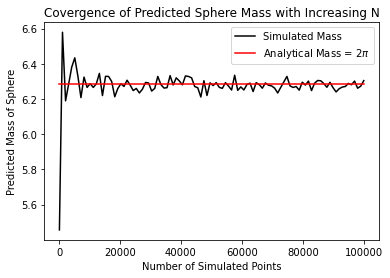

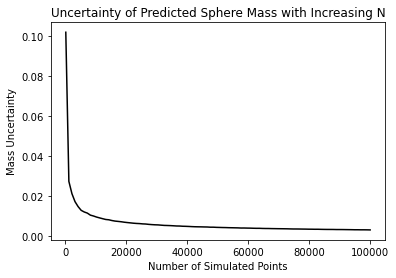

In [42]:
# starting value
n_in = 100
# ending value
n_fin = 100000
# linspace from starting to end in 100 steps
n_vals = np.linspace(start = n_in, stop = n_fin, num = 100)

# lists to hold values of coordinates, masses, and uncertainties
list_of_coordinates = []
masses = []
uncertainties = []

# for each step of N defined in linspace
for N in n_vals:
    # generating from random uniform distribution based on limits and size above
    x = np.random.uniform(low,high,int(N))
    y = np.random.uniform(low,high,int(N))
    z = np.random.uniform(low,high,int(N)) 
    
    # initializing empty list to hold each set of coordinates
    list_of_coordinates = []
    
    # generating N pairs of coordinates
    for i in range(int(N)):
        # refresh the cumulative pair list every time
        coord = []
        coord.append(x[i])
        coord.append(y[i])
        coord.append(z[i])
        # add list of both coordinates to set containing both coordinates
        list_of_coordinates.append(coord)

    # initial density is 0, and each point density will be added for running total 
    density_sum = 0
    
    # index variable for use in uncertainty equation
    # determines number of points that were in sphere
    index = 0
    
    # looping through all coordinates for each N 
    for j in list_of_coordinates:
            # if cindition satisfied of being inside the sphere
            if np.sqrt((j[0])**2 + (j[1])**2 + (j[2])**2) <= 1:
                
                # increment index for condition met
                index = index + 1
                
                # define the vriable radius and multiply it with the density of 2 to make linear
                r = np.sqrt((j[0])**2 + (j[1])**2 + (j[2])**2)
                l_density = 2 * r
                
                # add to running total
                density_sum = density_sum + l_density
                  

    #volume of cube with side lengths 2 = 8
    V = 8

    # equation for calculating the mass of a sphere
    mass = V*density_sum/int(N)
    
    # appending mass to list for later plotting
    masses.append(mass)
    
    #uncertainty to append to list for later plotting. Scales with 1/sqrt(N)
    uncertain  = np.sqrt((1 - (index)/(int(N)))/index)
    uncertainties.append(uncertain)
    
    
for index in range(len((uncertainties))):
    if uncertainties[index] < .01:
        desired_index = index
        print("The sampling N which is large enough for the uncertainty to be less than .01 is: "
              + str(int(n_vals[index])) + " with uncertainty: " + str(round(uncertainties[desired_index],4)))
        break
        
print("The simulated mass for N = 100K is: " + str(round(masses[-1],4)))
        
# theoretical value of the mass plotted, along with N vs mass
theoretical = np.ones(100) * 2*np.pi
plt.plot(n_vals,masses, color = 'black')
plt.plot(n_vals,theoretical, color = 'red')

# Adding all labels, details, and legend onto the plot
plt.xlabel('Number of Simulated Points')
plt.ylabel('Predicted Mass of Sphere')
plt.title('Covergence of Predicted Sphere Mass with Increasing N')
plt.legend(['Simulated Mass', r'Analytical Mass = $2\pi$'])
plt.show()

# plotting trend of N vs uncertainty in predicted mass 
plt.plot(n_vals,uncertainties, color = 'black')

# Adding all labels, details, and legend onto the plot
plt.xlabel('Number of Simulated Points')
plt.ylabel('Mass Uncertainty')
plt.title('Uncertainty of Predicted Sphere Mass with Increasing N')
plt.show()

In terms of this case, the density increases with radius. Thus, we still loop through the same list of n values. For each n, we generate the required number of coordinates and then we check if each point is less than radius 1. If so, we calculate that radius and multiply it by the density 2 From there, we sum up all valid poins densities. Then, we can calculate the mass by multiplying that by the volume 8 and dividing by the number of samples taken. In terms of the plots we see above, it is clear that the mass will also appear to get closer to converging to $2\pi$ when N gets significantly large. There will be still some smaller oscillations but they are much smaller than those with very small N. We also see the Mass uncertainty scaling in the same way as before, where it scales as $\sqrt{\frac{1-\epsilon}{N}}$. For larger N, the uncertainty greatly decreases. As for when the uncertainty is less than 1 percent, we can just check when the calculated uncertainty is less than that value, grab the index, and find the index in the n_vals array to find which N corresponds to it. This just happens to be usually around 10,000 points, give or take depending on randomness. We should also note the analytical value of the mass should be $2\pi$.


__Bonus (+3 points)__

Consider a density that is an unit exponential function of the radius according to $\rho(r)=\frac{1}{\rho_0}e^{−\rho_0 r}$.

In [43]:
# N is changed to 100K
N = 100000

# generating from random uniform distribution based on limits and size above
x = np.random.uniform(low,high,N)
y = np.random.uniform(low,high,N)
z = np.random.uniform(low,high,N) 
    
# initializing empty list to hold each set of coordinates
list_of_coordinates = []

# generating 1000 pairs of coordinates
for i in range(N):
    # refresh the cumulative pair list every time
    coord = []
    coord.append(x[i])
    coord.append(y[i])
    coord.append(z[i])
    # add list of both coordinates to set containing both coordinates
    list_of_coordinates.append(coord)

# initializing running total of density sum to add to for each point
density_sum = 0
   
# looping through all coordinates
for j in list_of_coordinates:
        # if satisfying the condition of being inside the sphere
        if np.sqrt((j[0])**2 + (j[1])**2 + (j[2])**2) <= 1:
            
            # defining the radius 
            r = np.sqrt((j[0])**2 + (j[1])**2 + (j[2])**2)
            
            # density value dep
            density = .5*np.exp(-2*r)
            density_sum = density_sum + density

print("The mass of the sphere with the unit exponential function density is: " + str((8*density_sum/N)))

The mass of the sphere with the unit exponential function density is: 0.503385560419677


The same concept is followed as the linear density problem, where we calculate the individual density at each point, except in this case, we don't have $2r$, but rather an exponentially decaying density with radius. Hence, we get a smaller value that the linearly increasing (with radius) density where $\rho(r)=\frac{1}{\rho_0}e^{−\rho_0 r}$. 